In [5]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import defaultdict

In [110]:
# read in files 
input_dir = "./result_temp/"
input_files = glob("%s/*.csv" % input_dir)

result_df_dict = defaultdict(list)


In [111]:
# parse and read files 
for input_file in input_files: 
    print(input_file)
    pheno_1 = input_file.split('/')[-1].split('.csv')[0].split('.')[3].split("_")[0].strip()
    pheno_2 = input_file.split('/')[-1].split('.csv')[0].split('.')[3].split("_")[-1].strip()
    pheno = input_file.split('/')[-1].split('.csv')[0].split('.')[3].strip()

    input_df = pd.read_csv(input_file)
    result_df_dict[pheno].append(input_df)

./result_temp/result.0.5.glucose1_length1.csv
./result_temp/result.0.7.heart_wt_length1.csv
./result_temp/result.0.2.heart_wt_length1.csv
./result_temp/result.0.35.heart_wt_weight1.csv
./result_temp/result.0.15.glucose1_length1.csv
./result_temp/result.0.9.weight1_length1.csv
./result_temp/result.0.35.weight1_length1.csv
./result_temp/result.0.8.weight1_length1.csv
./result_temp/result.0.25.heart_wt_length1.csv
./result_temp/result.0.8.heart_wt_length1.csv
./result_temp/result.0.35.glucose1_length1.csv
./result_temp/result.0.15.heart_wt_weight1.csv
./result_temp/result.0.5.heart_wt_weight1.csv
./result_temp/result.0.8.length1_weight1.csv
./result_temp/result.0.35.fat_mri_weight1.csv
./result_temp/result.0.9.fat_mri_weight1.csv
./result_temp/result.0.35.length1_weight1.csv
./result_temp/result.0.8.fat_mri_weight1.csv
./result_temp/result.0.9.length1_weight1.csv
./result_temp/result.0.5.fat_mri_weight1.csv
./result_temp/result.0.4.length1_weight1.csv
./result_temp/result.0.25.weight1_len

In [112]:
# merge the input_dfs 
merged_result_dict = {}
for key, value in result_df_dict.items():
    merged_df = pd.concat(value)
    merged_result_dict[key] = merged_df


In [152]:
# select one test for figure 1
select_pheno_pair = 'fat_mri_weight1'
result_df = merged_result_dict[select_pheno_pair]

In [153]:
f, ax = plt.subplots(ncols = 1, nrows = 2, figsize=(20, 10))

p = sns.boxplot(data = result_df, x = "missing_rate", y = "MSE", hue = "method",  ax = ax[0])

# generate same plot without genotype correlation
#    as this MSE value is too high - for subtle differences 
result_df_new = result_df[(result_df["method"] != "Genotype_correlation")]

p = sns.boxplot(data = result_df_new, x = "missing_rate", y = "MSE", hue = "method", ax = ax[1])


/Users/harryyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


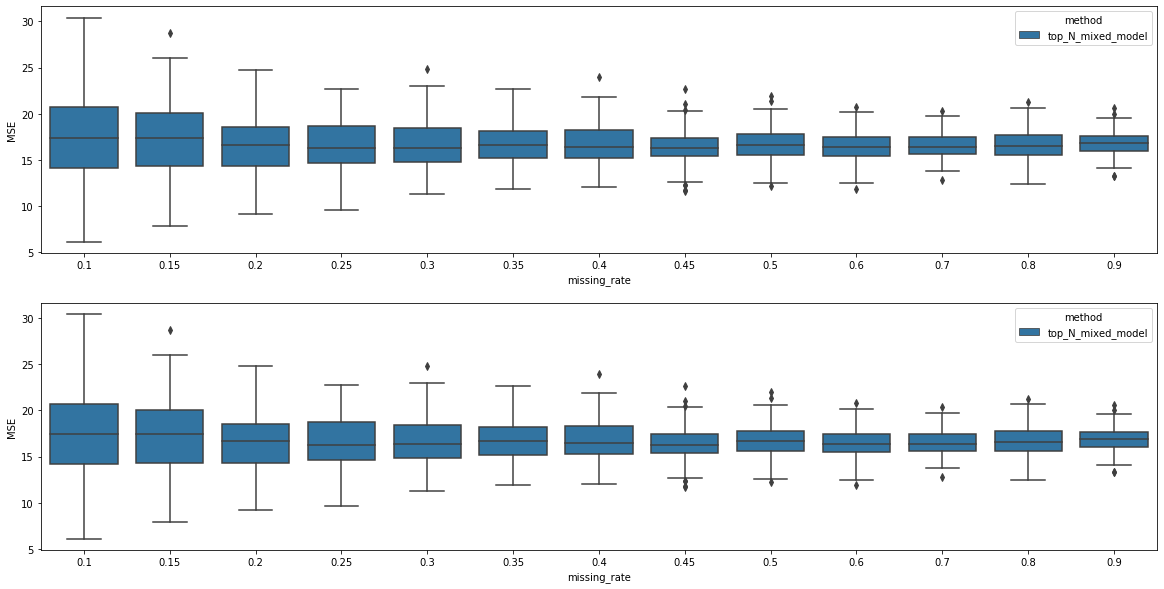

In [154]:
f

In [148]:
##### FIGURE 3 - top N changes 

# read in files 
input_dir = "./result/"
input_files = glob("%s/*.csv" % input_dir)

result_df_dict = defaultdict(list)

# parse and read files 
for input_file in input_files: 
    pheno = input_file.split('/')[-1].split('.csv')[0].split('.')[3].strip()
    topN = input_file.split('/')[-1].split('.csv')[0].split('.')[4].strip()
    
    input_df = pd.read_csv(input_file)
    input_df["topN"] = int(topN)
    result_df_dict[pheno].append(input_df)

# merge the input_dfs 
merged_result_dict = {}
for key, value in result_df_dict.items():
    merged_df = pd.concat(value)
    merged_result_dict[key] = merged_df


In [149]:
merged_result_dict.keys()

dict_keys(['heart_wt_weight1', 'fat_mri_weight1', 'weight1_length1', 'heart_wt_length1', 'glucose1_length1', 'length1_weight1'])

In [165]:
# select one test for figure 1
select_pheno_pair = 'glucose1_length1'
result_df = merged_result_dict[select_pheno_pair]

f, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(20, 10))

pal = sns.palplot(sns.color_palette("RdBu"))

p = sns.boxplot(data = result_df, x = "missing_rate", y = "MSE", hue = "topN", palette = pal, ax = ax)


/Users/harryyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/harryyang/anaconda3/lib/python3.6/site-packages/seaborn/miscplot.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, 1, figsize=(n * size, size))


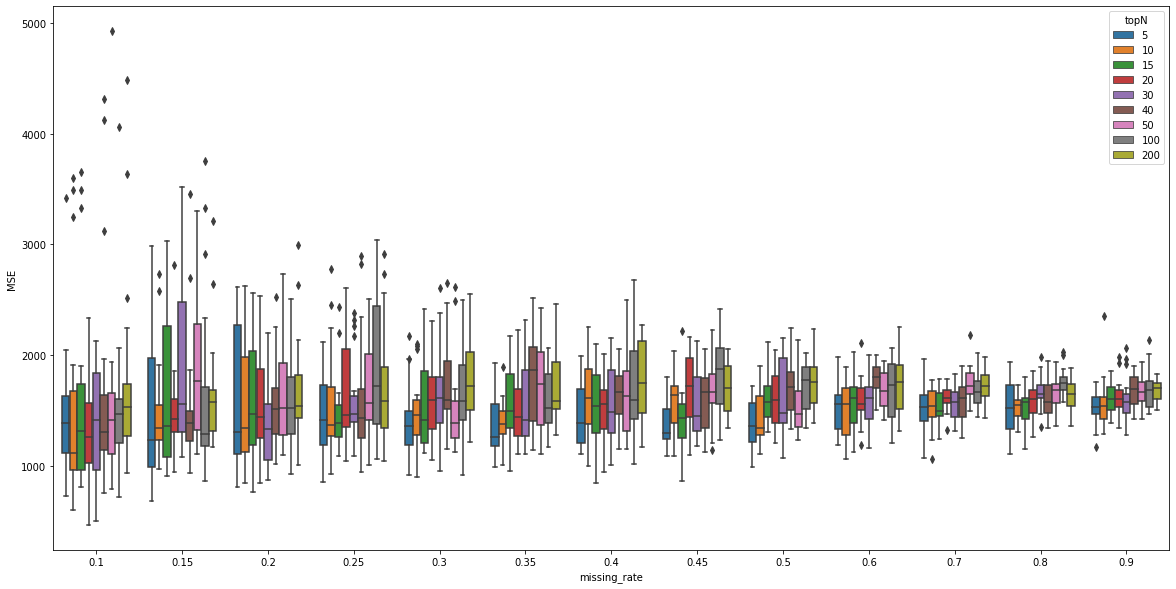

In [166]:
f